In [49]:
# Movie Rating Prediction

Importing Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
movie_data=pd.read_csv("/content/IMDb Movies India.csv", encoding='latin-1')

In [52]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [53]:
print(movie_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [54]:
print(movie_data.describe())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [55]:
movie_data.shape

(15509, 10)

Data Cleaning

In [56]:
movie_data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [57]:
movie_data.duplicated().sum()

6

In [58]:
movie_data.dropna(inplace=True)

In [59]:
movie_data.shape

(5659, 10)

In [60]:
#Checking if the Duplicated and null values are removed
movie_data.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [61]:
movie_data.drop_duplicates(inplace=True)

In [62]:
movie_data.shape

(5659, 10)

PreProcessing


In [63]:
#Converting "YEAR" column into Integer
movie_data['Year'] = movie_data['Year'].str.extract(r'(\d+)').astype(float).astype('Int64')


In [64]:
#Removing the word "min" from the Duration column and converting it into numeric
movie_data['Duration']=pd.to_numeric(movie_data['Duration'].str.replace('min',''))

In [65]:
# Convert 'Votes' column to numeric
movie_data['Votes'] = pd.to_numeric(movie_data['Votes'].str.replace(',', '', regex=True))


In [66]:
#Splitting the Genre ,to keep only unique genre by replacing null value by mode
movie_data['Genre']=movie_data['Genre'].str.split(", ")
movie_data=movie_data.explode('Genre')
movie_data['Genre']=movie_data['Genre'].fillna(movie_data['Genre'].mode()[0])

In [67]:
top_directors = movie_data['Director'].value_counts().nlargest(10).index
movie_data['Director'] = movie_data['Director'].apply(lambda x: x if x in top_directors else "Other")
movie_data= pd.get_dummies(movie_data, columns=['Director'], drop_first=True)

In [68]:
X = movie_data.drop(columns=['Rating', 'Name'])
y = movie_data['Rating']

Model Training

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [71]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [73]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training successfull")

Model training successfull


In [74]:
y_pred = model.predict(X_test)

In [75]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [76]:
print("\n📊 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R² Score: {r2:.3f}")


📊 Model Performance:
Mean Absolute Error (MAE): 0.428
Mean Squared Error (MSE): 0.448
R² Score: 0.763


In [77]:
new_movie = pd.DataFrame({
    'Year': [2023],
    'Duration': [120],
    'Votes': [100000],
    'Genre': ['Action'],
    'Director': ['Other']  .append(top_directors)
})

In [78]:
new_movie = pd.get_dummies(new_movie, columns=['Genre', 'Director'], drop_first=True)


In [79]:
new_movie = new_movie.reindex(columns=X_train.columns, fill_value=0)



In [80]:
predicted_rating = model.predict(new_movie)

print("\n🎬 Predicted IMDb Rating for New Movie:", predicted_rating[0])


🎬 Predicted IMDb Rating for New Movie: 6.769000000000006


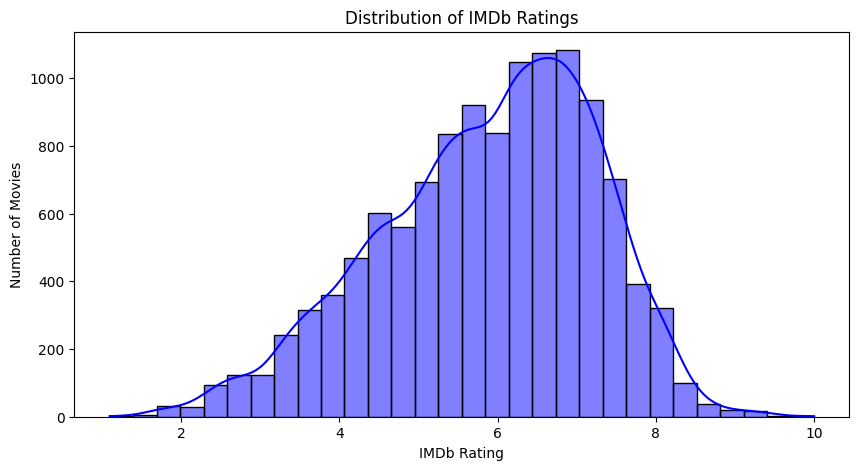

In [81]:
plt.figure(figsize=(10, 5))
sns.histplot(movie_data['Rating'], bins=30, kde=True, color='blue')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of IMDb Ratings')
plt.show()

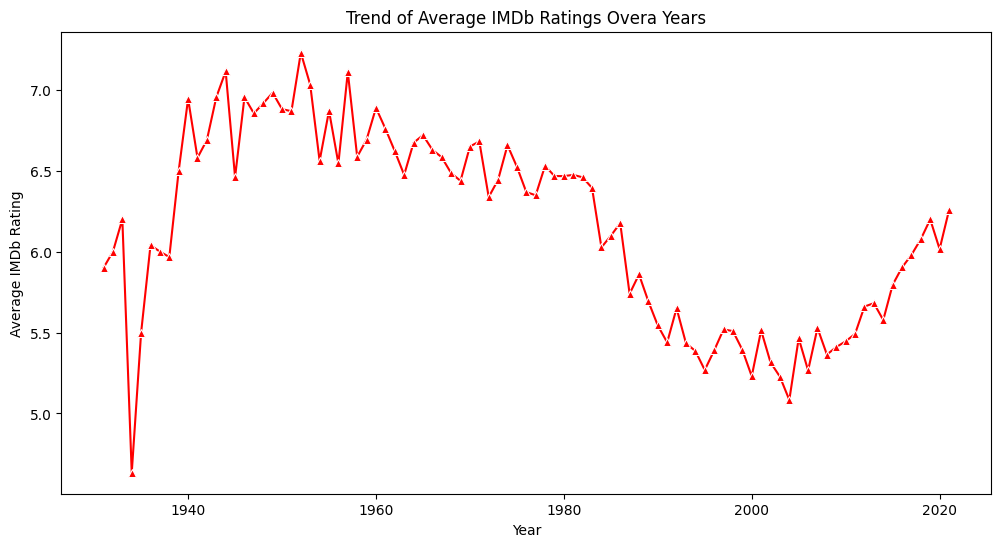

In [82]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_data.groupby('Year')['Rating'].mean(), marker='^', color='red')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.title('Trend of Average IMDb Ratings Overa Years')
plt.show()

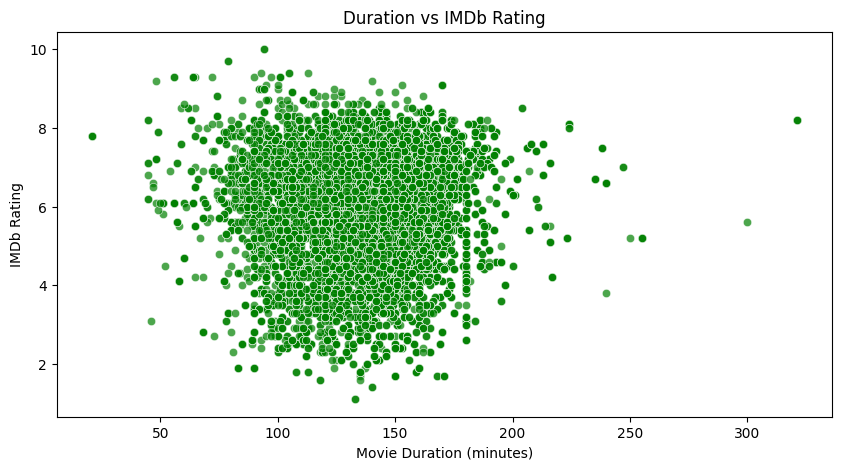

In [83]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Duration', y='Rating', alpha=0.7, data=movie_data, color='green') # Added data=movie_data
plt.xlabel('Movie Duration (minutes)')
plt.ylabel('IMDb Rating')
plt.title('Duration vs IMDb Rating')
plt.show()

<ipython-input-84-aaa9378e402e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg_rating.index, y=genre_avg_rating.values, palette='coolwarm')


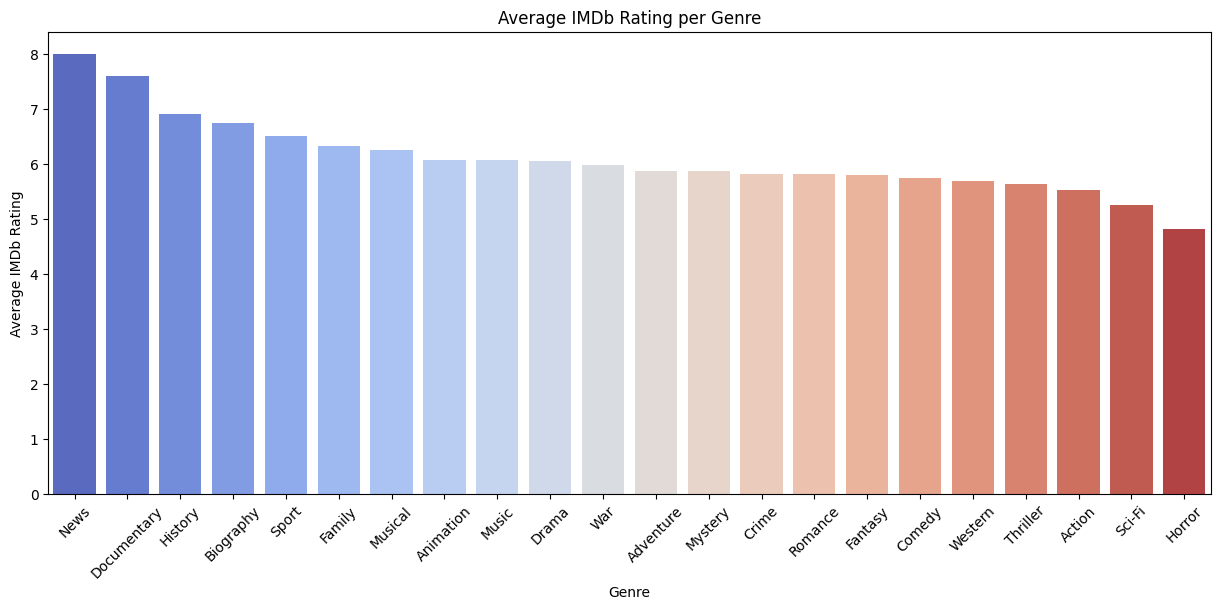

In [84]:
plt.figure(figsize=(15, 6))
genre_avg_rating = movie_data.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=genre_avg_rating.index, y=genre_avg_rating.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Rating per Genre')
plt.show()

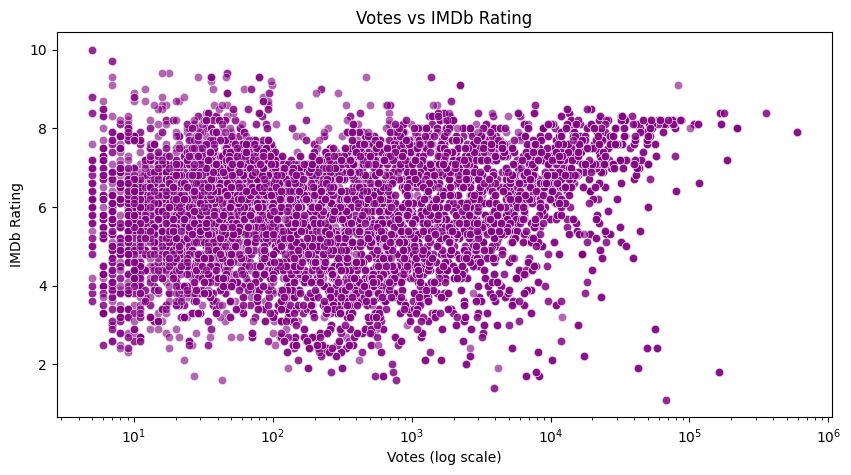

In [85]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=movie_data['Votes'], y=movie_data['Rating'], alpha=0.6, color='purple')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel('Votes (log scale)')
plt.ylabel('IMDb Rating')
plt.title('Votes vs IMDb Rating')
plt.show()